## Projekt NN

### Sortownia owoców. 
##### a. Klasyfikacja jabłek
##### b. Aplikacja na taśmie w fabryce dżemów
##### c. Typ zadania: klasyfikacja zdjęć
##### d. Źródło: https://www.kaggle.com/chrisfilo/fruit-recognition

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
import time
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import gc
import os
import glob
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import utils as np_utils

2021-11-13 21:04:24.917893: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-13 21:04:24.917937: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#ładowanie z łapy do X i y
'''
def load_img(df):
    img_paths = df["path"].values
    img_labels = df["label"].values
    X = []
    y = []
    
    for i, path in enumerate(img_paths):
        img =  plt.imread(path)
        img = cv2.resize(img, (150,150))
        label = img_labels[i]
        X.append(img)
        y.append(label)
    return np.array(X),np.array(y)

X, y = load_img(df)

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
'''
pass

In [3]:
#wczytanie
batch_size = 32
img_height = 256
img_width = 256
data_dir = "Apple/"


In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 6161 files belonging to 6 classes.
Using 4929 files for training.


2021-11-13 21:04:26.634833: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-13 21:04:26.634857: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-13 21:04:26.634879: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hpkk): /proc/driver/nvidia/version does not exist
2021-11-13 21:04:26.635153: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6161 files belonging to 6 classes.
Using 1232 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Apple A', 'Apple B', 'Apple C', 'Apple D', 'Apple E', 'Apple F']


2021-11-13 21:04:29.457787: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


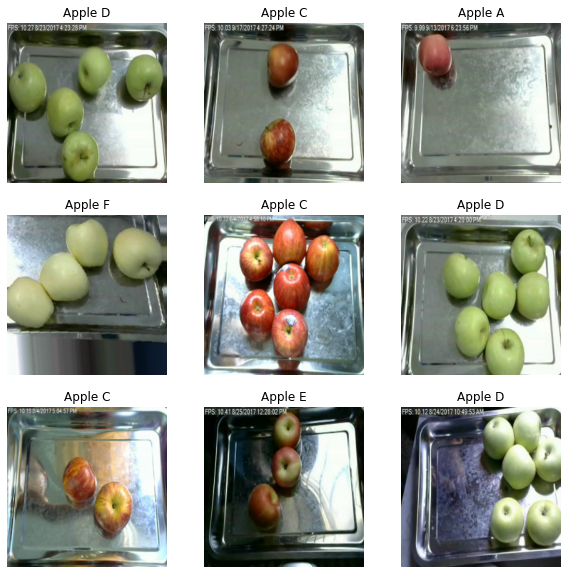

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
#wymiary
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


In [9]:
#standaryzacja na [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

### Model
Tu wstaw swój model bo chyba lepszy

In [ ]:
def create_model():
    shape_img = (256,256,3)
    num_classes = 6
    model = Sequential([
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(256),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(num_classes),
        tf.keras.layers.Activation('softmax')
    ])


    model.compile(
        optimizer='adam',
        loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])
    
    return model

In [ ]:
model = create_model()

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

In [40]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
model.count_params()

In [ ]:
model.predict(test_ds)

# Zapis modelu

In [ ]:
model.save('model.h5')

# Odtworzenie modelu

In [10]:
new_model = tf.keras.models.load_model('model.h5')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)       

# Predykcja na jabłkach Agi

Found 16 files belonging to 1 classes.
Using 8 files for validation.


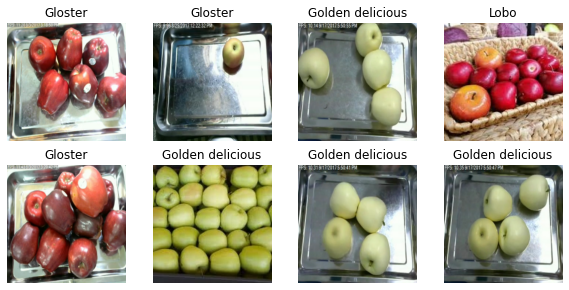

In [57]:
class_names= ['Cortland', 'Gloster', 'Gala', 'Granny Smith', 'Lobo', 'Golden delicious']
data_test = "test/"
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_test,
    validation_split = 0.5,
    subset="validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)
prediction = new_model.predict(test_ds)
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(len(prediction)):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(prediction[i])])
        plt.axis("off")

In [87]:
fotka = "test/jablka/1.jpg"
img = cv2.imread(fotka)
img = cv2.resize(img,(256,256))
img = np.reshape(img,[1,256,256,3])
pred = new_model.predict(img)
class_names[np.argmax(pred)]

'Golden delicious'